In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import numpy as np

In [2]:
building_df =  pd.read_csv("de_normalized_data.csv")
building_df.head()

,company_id,company,CardNumber,DirectionOfEntry,ServerDateTime,DoorName
0,111102,ABC121,20081,IN,1/8/2019 1:14,20th Floor NETPOP #1
1,111102,ABC121,20081,IN,1/8/2019 1:15,Frieght Elevator S1 Cab
2,111102,ABC121,20081,IN,1/8/2019 1:15,Frieght Elevator S1 Cab
3,111102,ABC121,20081,IN,1/8/2019 1:17,Frieght Elevator S1 Cab
4,111102,ABC121,20081,IN,1/8/2019 1:21,GND Floor Garage Entry


In [3]:
building_df = building_df[building_df.CardNumber > 0]

building_df['ServerDateTime'] = pd.to_datetime(building_df['ServerDateTime'])
building_df['Date'] = pd.to_datetime(building_df['ServerDateTime'].dt.strftime('%m/%d/%Y'))
# df['Time'] = df['MessageDateTime'].dt.strftime('%H:%M:%S')
building_df['Hour'] = pd.to_numeric(building_df['ServerDateTime'].dt.strftime('%H'))
building_df['Minutes'] = building_df['ServerDateTime'].dt.strftime('%M')
building_df['DayOfMonth'] = building_df['ServerDateTime'].dt.strftime("%d")
building_df['WeekDay'] = building_df['ServerDateTime'].dt.weekday
building_df.head()

,company_id,company,CardNumber,DirectionOfEntry,ServerDateTime,DoorName,Date,Hour,Minutes,DayOfMonth,WeekDay
0,111102,ABC121,20081,IN,2019-01-08 01:14:00,20th Floor NETPOP #1,2019-01-08,1,14,08,1
1,111102,ABC121,20081,IN,2019-01-08 01:15:00,Frieght Elevator S1 Cab,2019-01-08,1,15,08,1
2,111102,ABC121,20081,IN,2019-01-08 01:15:00,Frieght Elevator S1 Cab,2019-01-08,1,15,08,1
3,111102,ABC121,20081,IN,2019-01-08 01:17:00,Frieght Elevator S1 Cab,2019-01-08,1,17,08,1
4,111102,ABC121,20081,IN,2019-01-08 01:21:00,GND Floor Garage Entry,2019-01-08,1,21,08,1


In [4]:
building_df

,company_id,company,CardNumber,DirectionOfEntry,ServerDateTime,DoorName,Date,Hour,Minutes,DayOfMonth,WeekDay
0,111102,ABC121,20081,IN,2019-01-08 01:14:00,20th Floor NETPOP #1,2019-01-08,1,14,08,1
1,111102,ABC121,20081,IN,2019-01-08 01:15:00,Frieght Elevator S1 Cab,2019-01-08,1,15,08,1
2,111102,ABC121,20081,IN,2019-01-08 01:15:00,Frieght Elevator S1 Cab,2019-01-08,1,15,08,1
3,111102,ABC121,20081,IN,2019-01-08 01:17:00,Frieght Elevator S1 Cab,2019-01-08,1,17,08,1
4,111102,ABC121,20081,IN,2019-01-08 01:21:00,GND Floor Garage Entry,2019-01-08,1,21,08,1
5,111102,ABC121,20081,IN,2019-01-08 01:25:00,1st Floor Lobby to Dock West,2019-01-08,1,25,08,1
6,111102,ABC121,20081,IN,2019-01-08 01:31:00,Freight Elevator S2 Cab,2019-01-08,1,31,08,1
7,111102,ABC121,20081,IN,2019-01-08 01:33:00,Freight Elevator S2 Cab,2019-01-08,1,33,08,1
8,111102,ABC121,20081,IN,2019-01-08 01:34:00,20th Floor Staff Engineers Rm,2019-01-08,1,34,08,1
9,111102,ABC121,20081,IN,2019-01-08 01:49:00,20th Floor Staff Engineers Rm,2019-01-08,1,49,08,1


In [6]:
grouped_df = building_df.groupby(['Date','Hour'])['company'].count().reset_index()
grouped_df['eachhourcount']=grouped_df['company']
grouped_df

,Date,Hour,company,eachhourcount
0,2019-01-08,1,12,12
1,2019-01-08,2,4,4
2,2019-01-08,3,4,4
3,2019-01-08,4,1,1
4,2019-01-08,5,4,4
5,2019-01-08,6,11,11
6,2019-01-08,9,9,9
7,2019-01-08,10,6,6
8,2019-01-08,12,3,3
9,2019-01-08,13,11,11


In [7]:
grouped_df['hourlycountfornexthour'] = grouped_df['company'].shift(-1)
grouped_df

,Date,Hour,company,eachhourcount,hourlycountfornexthour
0,2019-01-08,1,12,12,4.0
1,2019-01-08,2,4,4,4.0
2,2019-01-08,3,4,4,1.0
3,2019-01-08,4,1,1,4.0
4,2019-01-08,5,4,4,11.0
5,2019-01-08,6,11,11,9.0
6,2019-01-08,9,9,9,6.0
7,2019-01-08,10,6,6,3.0
8,2019-01-08,12,3,3,11.0
9,2019-01-08,13,11,11,12.0


In [8]:
grouped_df = grouped_df.dropna(subset=['hourlycountfornexthour'])

In [10]:
X = grouped_df[['eachhourcount']]
y = grouped_df["hourlycountfornexthour"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1205, 1) (1205, 1)


In [12]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["eachhourcount"])
data_binary_encoded

,eachhourcount_1,eachhourcount_2,eachhourcount_3,eachhourcount_4,eachhourcount_5,eachhourcount_6,eachhourcount_7,eachhourcount_8,eachhourcount_9,eachhourcount_10,...,eachhourcount_876,eachhourcount_891,eachhourcount_894,eachhourcount_901,eachhourcount_902,eachhourcount_917,eachhourcount_918,eachhourcount_1010,eachhourcount_1070,eachhourcount_1179
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train

,eachhourcount
1182,85
1022,15
937,18
380,7
593,32
5,11
100,19
644,114
513,197
481,90


In [14]:
y

array([[4.],
       [4.],
       [1.],
       ...,
       [2.],
       [6.],
       [1.]])

In [15]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

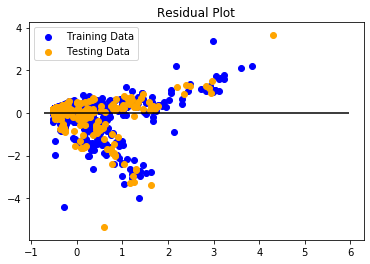

In [16]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.628531804107634, R2: 0.4706283972328446
